In [11]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from fitter import Fitter

In [ ]:
# Generar datos de ejemplo
data = np.random.normal(loc=0, scale=1, size=1000)

In [12]:

# Pruebas de normalidad
shapiro_test = stats.shapiro(data)
anderson_test = stats.anderson(data, dist='norm')
dagostino_test = stats.normaltest(data)

print("Shapiro-Wilk Test")
print("Evalúa la hipótesis nula de que una muestra proviene de una distribución normal. Es una prueba muy sensible para muestras pequeñas.")
print("Shapiro-Wilk Test:", shapiro_test)
print("Si el valor p es menor que 0.05, se rechaza la hipótesis nula, sugiriendo que los datos no son normales.\n")

print("Anderson-Darling Test")
print("Evalúa la hipótesis nula de que los datos siguen una distribución específica (por defecto, normal).")
print("Anderson-Darling Test:", anderson_test)
print("El resultado incluye un estadístico de prueba y una serie de valores críticos.\n"
      f"Si el estadístico es mayor que los valores críticos correspondientes a ciertos niveles de significancia, se rechaza la hipótesis nula.\n")

print("D'Agostino's K-squared Test")
print("Compara una muestra con una distribución de referencia (normal en este caso).")
print("D'Agostino's K-squared Test:", dagostino_test)
print("Si el valor p es menor que 0.05, se rechaza la hipótesis nula, sugiriendo que los datos no son normales.\n")

Shapiro-Wilk Test
Evalúa la hipótesis nula de que una muestra proviene de una distribución normal. Es una prueba muy sensible para muestras pequeñas.
Shapiro-Wilk Test: ShapiroResult(statistic=0.9983408586650224, pvalue=0.45528206840858154)
Si el valor p es menor que 0.05, se rechaza la hipótesis nula, sugiriendo que los datos no son normales.

Anderson-Darling Test
Evalúa la hipótesis nula de que los datos siguen una distribución específica (por defecto, normal).
Anderson-Darling Test: AndersonResult(statistic=0.44200822290179076, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.0679294632361939, scale=1.0564448832561808)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
El resultado incluye un estadístico de prueba y una serie de valores críticos.
Si el estadístico es mayor que los valores críticos correspondientes a ciertos niveles de signific

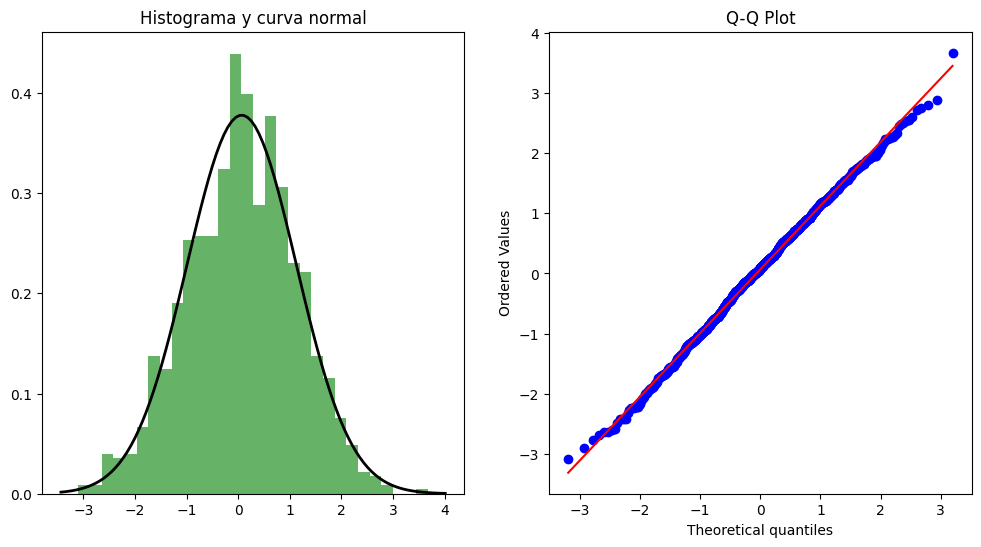

In [15]:
# Visualizaciones
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, loc=np.mean(data), scale=np.std(data))
plt.plot(x, p, 'k', linewidth=2)
plt.title("Histograma y curva normal")

plt.subplot(1, 2, 2)
stats.probplot(data, dist="norm", plot=plt)
plt.title("Q-Q Plot")

plt.show()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,0.244023,544.975591,554.791102,inf,0.022548,6.807492e-01
lognorm,0.245991,545.108109,559.831375,inf,0.023547,6.274773e-01
gamma,0.250330,542.613332,557.336598,inf,0.027554,4.258985e-01
expon,2.824767,448.165377,457.980887,inf,0.338221,1.475326e-102


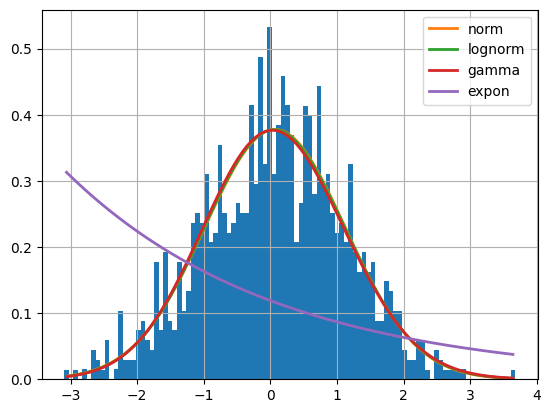

In [16]:
# Ajuste de distribución con Fitter
f = Fitter(data, distributions=['norm', 'lognorm', 'expon', 'gamma'])
f.fit()
f.summary()
